___

<a href='https://github.com/ai-vithink'> <img src='https://avatars1.githubusercontent.com/u/41588940?s=200&v=4' /></a>
___

# Pandas Built-in Data Visualization

In this lecture we will learn about pandas built-in capabilities for data visualization! It's built-off of matplotlib, but it baked into pandas for easier usage!  

Let's take a look!

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')
# To hide warnings, which won't change the desired outcome.

In [3]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 3px  black solid !important;
  color: black !important;
}
# For having gridlines 

In [4]:
import warnings
warnings.filterwarnings("ignore")


In [5]:
df1 = pd.read_csv('df1',index_col = 0)

In [6]:
df1.head()
# Index is a time series

,A,B,C,D
2000-01-01,1.339091,-0.163643,-0.646443,1.041233
2000-01-02,-0.774984,0.137034,-0.882716,-2.253382
2000-01-03,-0.921037,-0.482943,-0.417100,0.478638
2000-01-04,-1.738808,-0.072973,0.056517,0.015085
2000-01-05,-0.905980,1.778576,0.381918,0.291436


In [7]:
df2 = pd.read_csv('df2') # Non time series

In [8]:
df2.head() # Random data with sequential index

,a,b,c,d
0,0.039762,0.218517,0.103423,0.957904
1,0.937288,0.041567,0.899125,0.977680
2,0.780504,0.008948,0.557808,0.797510
3,0.672717,0.247870,0.264071,0.444358
4,0.053829,0.520124,0.552264,0.190008


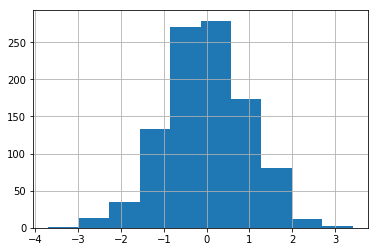

In [9]:
# Say we wanted to have a histrogram for all the values of A column of df1
# Pandas can do that in the following manner :
df1['A'].hist() # DataFrame_name['Column_Name'].hist()
# Calls matplotlib under the hood, so matplotlib arguments are applicable.

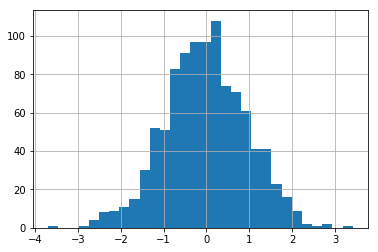

In [10]:
df1['A'].hist(bins=30)

In [11]:
# The styles don't look that stylish so we import seaborn as sns and then try plotting again and see how our plot looks


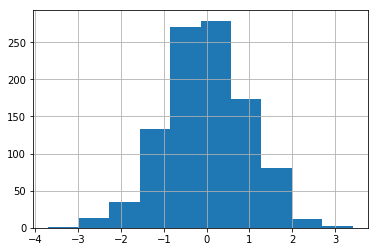

In [12]:
df1['A'].hist()

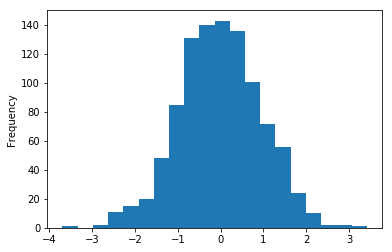

In [13]:
df1['A'].plot(kind='hist',bins = 20) # Calling off of DataFrame

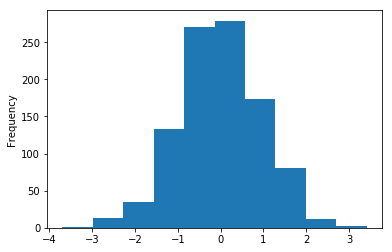

In [14]:
df1['A'].plot.hist()

# Plot Types

There are several plot types built-in to pandas, most of them statistical plots by nature:

* df.plot.area     
* df.plot.barh     
* df.plot.density  
* df.plot.hist     
* df.plot.line     
* df.plot.scatter
* df.plot.bar      
* df.plot.box      
* df.plot.hexbin   
* df.plot.kde      
* df.plot.pie

You can also just call df.plot(kind='hist') or replace that kind argument with any of the key terms shown in the list above (e.g. 'box','barh', etc..)
___

Let's start going through them!

## Area

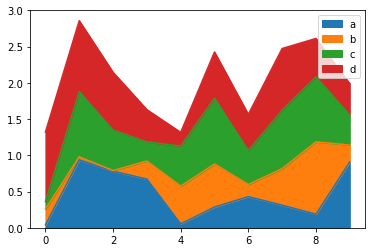

In [15]:
df2.plot.area()

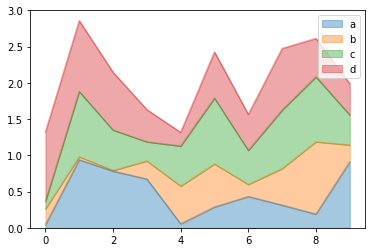

In [17]:
# For transparency on area plot use alpha
df2.plot.area(alpha = 0.4)

## Barplots

In [18]:
df2

,a,b,c,d
0,0.039762,0.218517,0.103423,0.957904
1,0.937288,0.041567,0.899125,0.977680
2,0.780504,0.008948,0.557808,0.797510
3,0.672717,0.247870,0.264071,0.444358
4,0.053829,0.520124,0.552264,0.190008
5,0.286043,0.593465,0.907307,0.637898
6,0.430436,0.166230,0.469383,0.497701
7,0.312296,0.502823,0.806609,0.850519
8,0.187765,0.997075,0.895955,0.530390
9,0.908162,0.232726,0.414138,0.432007


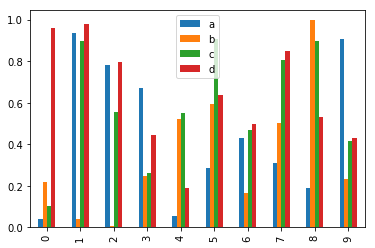

In [19]:
df2.plot.bar()

* As df is small and with sequential index then we do the bar plotting, if index is categorical then as a category it will list each category as column
* We can create bar plot to be stacked by passing in stacked = True

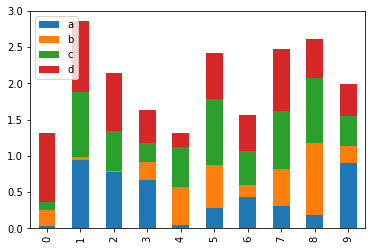

In [20]:
df2.plot.bar(stacked = True)

## Histograms

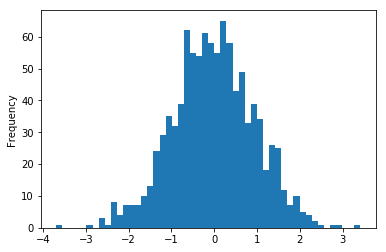

In [21]:
df1['A'].plot.hist(bins=50)

## Line Plots

In [22]:
# df1.plot.line(x=df1.index,y="A",figsize=(12,3),lw=1)
# line parameter calls the lineplot, and we have to specify x and y, x is actual index  

## Scatter Plots

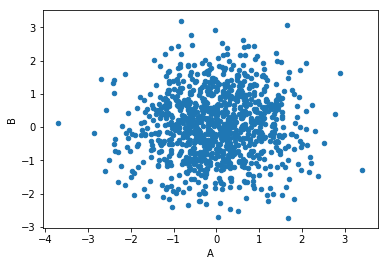

In [23]:
df1.plot.scatter(x='A',y='B')
# Creates scatter plot

You can use c to color based off another column value
Use cmap to indicate colormap to use. 
For all the colormaps, check out: http://matplotlib.org/users/colormaps.html

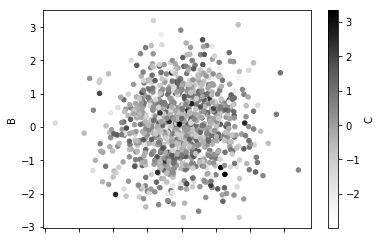

In [24]:
df1.plot.scatter(x='A',y='B',c='C')

* Set the colour based off of another column using c = 'Column_name'
* On running that we get a black and white plot
* What happens is we have A, B and C a 3-D plot as we have a v/s b and third argument c as well comes into picture.

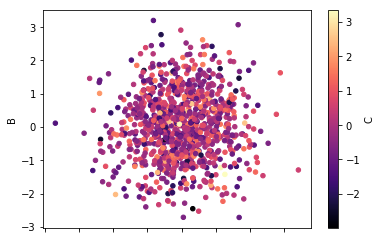

In [25]:
df1.plot.scatter(x='A',y='B',c='C',cmap='magma')

* If one prefers to show things by size and not by colour then instead what we can do is pass in s and dataframe column to it.

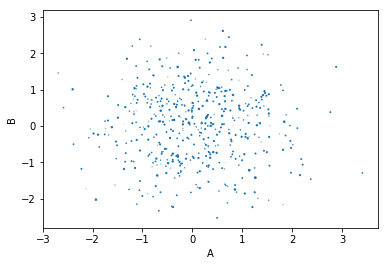

In [26]:
df1.plot.scatter(x='A',y='B',s=df1['C'])

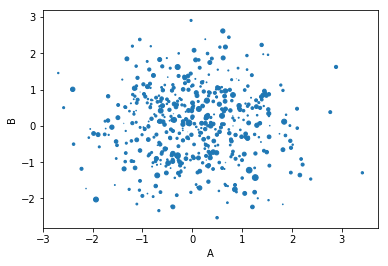

In [27]:
df1.plot.scatter(x='A',y='B',s=df1['C']*10) # points too small, multiply by some factor
# Plot is A vs B and size tells their C value relative to each other.

## BoxPlots

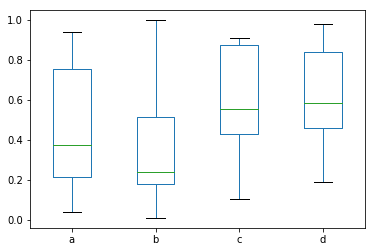

In [28]:
df2.plot.box() # Box plot done for us per column

## Hexagonal Bin Plot

Useful for Bivariate Data, alternative to scatterplot:

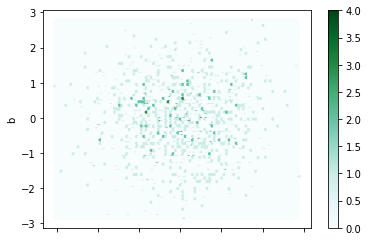

In [29]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df.plot.hexbin(x='a',y='b')
# Like a scatter-plot instead these are hexagonal bins.

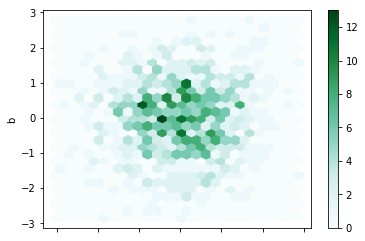

In [30]:
# Change gridsize to increase the hexagonal bin size
# Hexagonals are more darker when there are more points inside them.
df.plot.hexbin(x='a',y='b',gridsize=25)

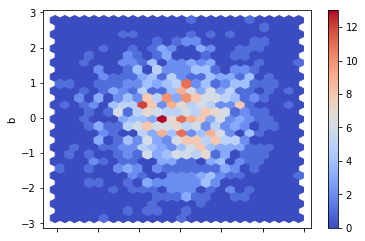

In [31]:
df.plot.hexbin(x='a',y='b',gridsize=25,cmap='coolwarm')

## Kernel Density Estimation plot (KDE)

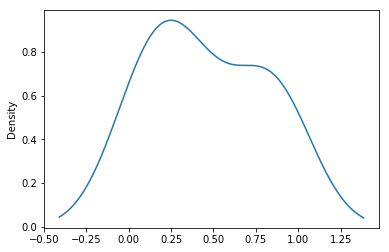

In [32]:
# Call column and plot.kde()
df2['a'].plot.kde() # instead of kde() , density() can be called too

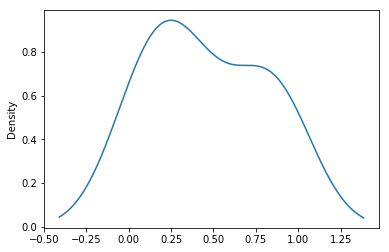

In [33]:
df2['a'].plot.density()

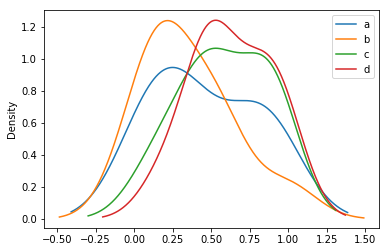

In [34]:
# Can be done for entire DataFrame as well KDE/Density
df2.plot.kde()

That's it! Hopefully you can see why this method of plotting will be a lot easier to use than full-on matplotlib, it balances ease of use with control over the figure. A lot of the plot calls also accept additional arguments of their parent matplotlib plt. call. 

Next we will learn about seaborn, which is a statistical visualization library designed to work with pandas dataframes well.

Before that though, we'll have a quick exercise for you!

# Great Job!